In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

Anime_df = pd.read_csv('anime.csv')

In [16]:
Anime_df
# del Anime_df['sznOfRelease']
Anime_df = Anime_df.drop(columns = ['description','ongoing','studios','tags','contentWarn'])

In [20]:
Anime_df.isnull().sum()
Anime_df.shape

(14578, 12)

In [22]:
Anime_df

,title,mediaType,eps,duration,startYr,finishYr,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,2009.0,2010.0,103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,2016.0,2016.0,58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,2016.0,2016.0,45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,2016.0,2016.0,25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,2019.0,2019.0,21308.0,3217,7864,174,4.650,15789.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14573,"Welcome to Demon School, Iruma-kun 2",TV,NaN,NaN,2021.0,2021.0,0.0,0,1106,0,NaN,NaN
14574,Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai,Music Video,1.0,4.0,2020.0,2020.0,9.0,1,7,1,NaN,NaN
14575,Minagoroshi,OVA,1.0,1.0,2005.0,2005.0,3.0,0,7,0,NaN,NaN
14576,Kurayukaba,Movie,NaN,NaN,NaN,NaN,0.0,0,62,0,NaN,NaN


In [24]:
Anime_df.isnull().sum()

title           0
mediaType      68
eps           359
duration     5441
startYr       222
finishYr      444
watched       222
watching        0
wantWatch       0
dropped         0
rating       2471
votes        2459
dtype: int64

In [25]:
Anime_df = Anime_df.dropna()

C:\Users\ALI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


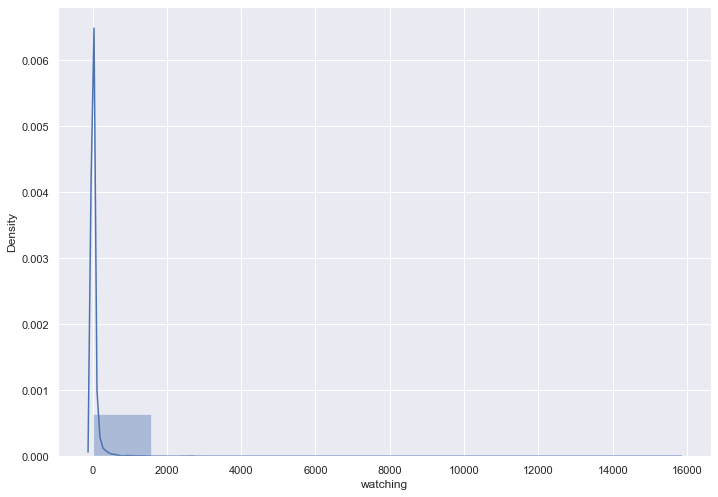

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Anime_df['watching'], bins=10)
plt.show()

<AxesSubplot:>

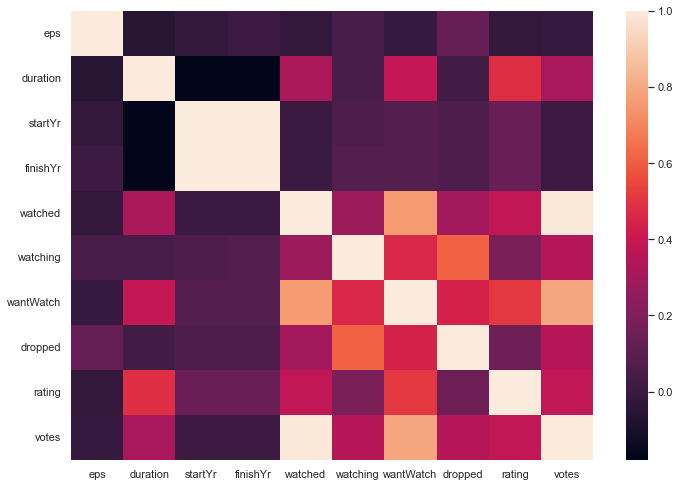

In [31]:
correlation_matrix = Anime_df.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=False)

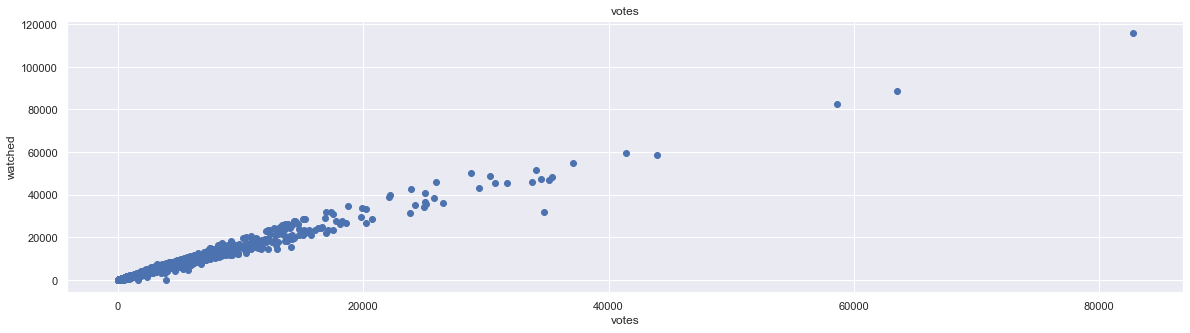

In [35]:
plt.figure(figsize=(20, 5))

features = ['votes']
target = Anime_df['watched']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Anime_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('watched')

In [40]:
X = pd.DataFrame(np.c_[Anime_df['votes'], Anime_df['watched']], columns = ['votes','watched'])
y = Anime_df['wantWatch']

print(X.dtypes)
print(y.dtypes)

votes      float64
watched    float64
dtype: object
int64


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6640, 2)
(738, 2)
(6640,)
(738,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [46]:
from sklearn.metrics import r2_score
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 763.8788050588659
R2 score is 0.6563828132925595


The model performance for testing set
--------------------------------------
RMSE is 428567.3807187745
R2 score is 0.6945539980149842


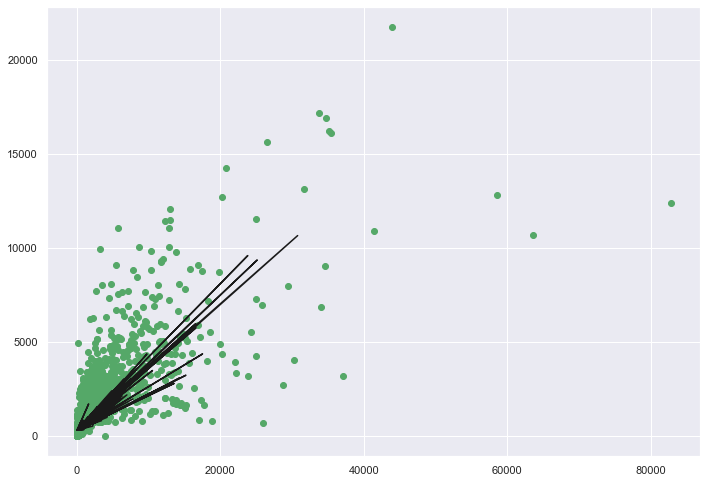

In [50]:
plt.scatter(X_train['votes'], Y_train,color='g') 
#plt.scatter(X_train['YearRemodAdd'], Y_train,color='b') 
plt.plot(X_test['votes'], y_test_predict,color='k') 



plt.show()

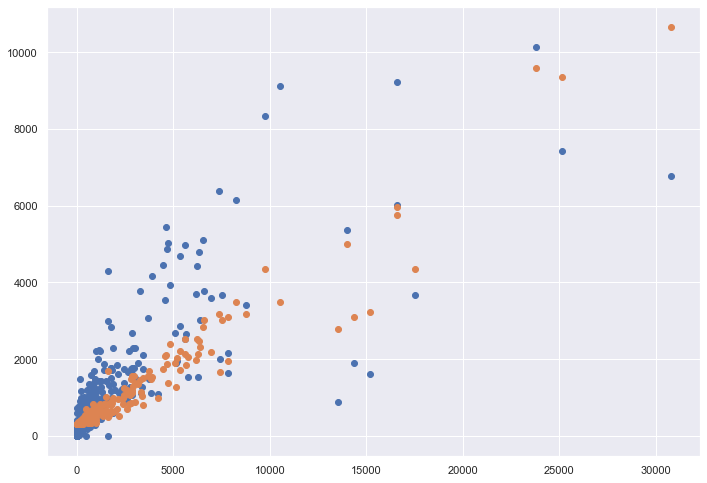

In [52]:
plt.scatter(X_test['votes'],Y_test)
plt.scatter(X_test['votes'],y_test_predict)
plt.show()